# Prerequisites

In [14]:
pip install arff numpy pandas matplotlib sklearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Import libraries

In [3]:
from scipy.io import arff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10,5)

# Read the dataset

In [6]:
data_frame = pd.read_csv('datasets/desharnais.csv', header=0)
data_frame.head()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1


## Raw details

In [3]:
data_frame.shape

(81, 13)

In [4]:
data_frame.info

<bound method DataFrame.info of     id  Project  TeamExp  ManagerExp  YearEnd  Length  Effort  Transactions  \
0    1        1        1           4       85      12    5152           253   
1    2        2        0           0       86       4    5635           197   
2    3        3        4           4       85       1     805            40   
3    4        4        0           0       86       5    3829           200   
4    5        5        0           0       86       4    2149           140   
..  ..      ...      ...         ...      ...     ...     ...           ...   
76  77       77        4           4       85      12    1400           229   
77  78       78        4           3       83      12    2800           227   
78  79       79        4           4       82      24    9520           395   
79  80       80        4           3       86      12    5880           469   
80  81       81        4           4       85      36   23940           886   

    Entities  Point

In [5]:
data_frame.describe

<bound method NDFrame.describe of     id  Project  TeamExp  ManagerExp  YearEnd  Length  Effort  Transactions  \
0    1        1        1           4       85      12    5152           253   
1    2        2        0           0       86       4    5635           197   
2    3        3        4           4       85       1     805            40   
3    4        4        0           0       86       5    3829           200   
4    5        5        0           0       86       4    2149           140   
..  ..      ...      ...         ...      ...     ...     ...           ...   
76  77       77        4           4       85      12    1400           229   
77  78       78        4           3       83      12    2800           227   
78  79       79        4           4       82      24    9520           395   
79  80       80        4           3       86      12    5880           469   
80  81       81        4           4       85      36   23940           886   

    Entities  Poi

# Check for missing data

In [6]:
nan_cols = data_frame.isna().any()
print("Missing columns in data: ", data_frame.columns[nan_cols])

Missing columns in data:  Index([], dtype='object')


In [7]:
# Delete projects 38, 44, 66, 75
print('----- Project 38 -----')
print(data_frame.loc[37])
print('-----------------------')
print('----- Project 44 -----')
print(data_frame.loc[43])
print('-----------------------')
print('----- Project 66 -----')
print(data_frame.loc[65])
print('-----------------------')
print('----- Project 75 -----')
print(data_frame.loc[74])
print('-----------------------')

data_frame = data_frame.drop([data_frame.index[37], data_frame.index[43], data_frame.index[65], data_frame.index[74]])

# store the final form of the data_frame
%store data_frame

print(data_frame.shape)

----- Project 38 -----
id                   38
Project              38
TeamExp              -1
ManagerExp           -1
YearEnd              87
Length                8
Effort             5922
Transactions        260
Entities            144
PointsNonAdjust     404
Adjustment           24
PointsAjust         360
Language              1
Name: 37, dtype: int64
-----------------------
----- Project 44 -----
id                    44
Project               44
TeamExp               -1
ManagerExp             4
YearEnd               86
Length                39
Effort             19894
Transactions         284
Entities             230
PointsNonAdjust      514
Adjustment            50
PointsAjust          591
Language               1
Name: 43, dtype: int64
-----------------------
----- Project 66 -----
id                   66
Project              66
TeamExp               2
ManagerExp           -1
YearEnd              87
Length               10
Effort             6783
Transactions        224
Entities

# Univariate selection

In [7]:
features = [ 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities',
        'PointsNonAdjust', 'Adjustment', 'PointsAjust']

core_features = ['Length', 'Transactions', 'Entities','PointsNonAdjust','PointsAjust']

%store features
%store core_features

X = data_frame[features]
Y = data_frame['Effort']

Stored 'features' (list)
Stored 'core_features' (list)


In [8]:
# apply SelectKBest class to order the features by importance
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(X,Y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

print(featureScores.nlargest(9,'Score'))

             Specs      Score
8      PointsAjust  94.643085
6  PointsNonAdjust  78.263476
3           Length  73.109621
4     Transactions  40.441049
5         Entities  27.819542
7       Adjustment  21.658882
1       ManagerExp   2.030603
0          TeamExp   1.145054
2          YearEnd   0.185241


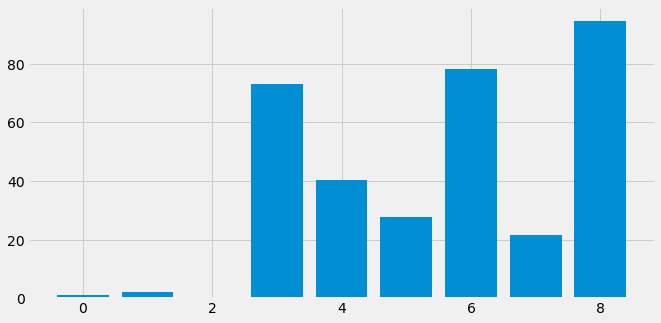

In [13]:
# plot the scores
pyplot.bar([i for i in range(len(bestfeatures.scores_))], bestfeatures.scores_)
pyplot.show()

# Feature importance

[0.08565789 0.09513158 0.08802632 0.11907895 0.12960526 0.12263158
 0.12171053 0.11684211 0.12131579]


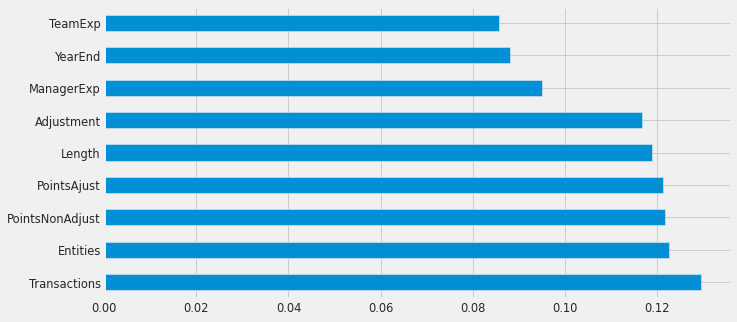

In [80]:
model = ExtraTreesClassifier()
model.fit(X,Y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

# Pearson's corelation

In this section, the correlations between attributes of Desharnais dataset and software effort are analyzed and applicability of the regression analysis is examined. The correlation between two variables is a measure of how well the variables are related. The most common measure of correlation in statistics is the Pearson Correlation (or the Pearson Product Moment Correlation - PPMC) which shows the linear relationship between two variables.

Pearson correlation coefficient analysis produces a result between -1 and 1. A result of -1 means that there is a perfect negative correlation between the two values at all, while a result of 1 means that there is a perfect positive correlation between the two variables.

Results between 0.5 and 1.0 indicate high correlation.Correlation coefficients are used in statistics to measure how strong a relationship is between two variables. There are several types of correlation coefficient. Pearson’s correlation (also called Pearson’s R) is a correlation coefficient commonly used in linear regression.

In [65]:
data_frame.corr()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
id,1.000000,1.000000,0.029183,0.316317,0.114899,0.256569,0.131477,0.274096,0.024840,0.231822,-0.214070,0.210966,0.384799
Project,1.000000,1.000000,0.029183,0.316317,0.114899,0.256569,0.131477,0.274096,0.024840,0.231822,-0.214070,0.210966,0.384799
TeamExp,0.029183,0.029183,1.000000,0.411004,-0.224948,0.323269,0.259288,0.148266,0.337761,0.278113,0.311847,0.308116,-0.122302
ManagerExp,0.316317,0.316317,0.411004,1.000000,0.004513,0.238527,0.160075,0.162635,0.228315,0.238118,-0.128040,0.200794,0.254794
YearEnd,0.114899,0.114899,-0.224948,0.004513,1.000000,-0.081990,-0.077677,0.016799,0.001058,0.013989,-0.072112,-0.003111,0.372095
Length,0.256569,0.256569,0.323269,0.238527,-0.081990,1.000000,0.656967,0.671385,0.476066,0.763353,0.202221,0.734511,-0.001646
Effort,0.131477,0.131477,0.259288,0.160075,-0.077677,0.656967,1.000000,0.596583,0.500223,0.714654,0.417129,0.735118,-0.249911
Transactions,0.274096,0.274096,0.148266,0.162635,0.016799,0.671385,0.596583,1.000000,0.176274,0.886099,0.335591,0.883853,0.152031
Entities,0.024840,0.024840,0.337761,0.228315,0.001058,0.476066,0.500223,0.176274,1.000000,0.612435,0.212606,0.589123,-0.043193
PointsNonAdjust,0.231822,0.231822,0.278113,0.238118,0.013989,0.763353,0.714654,0.886099,0.612435,1.000000,0.369622,0.987220,0.101757


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

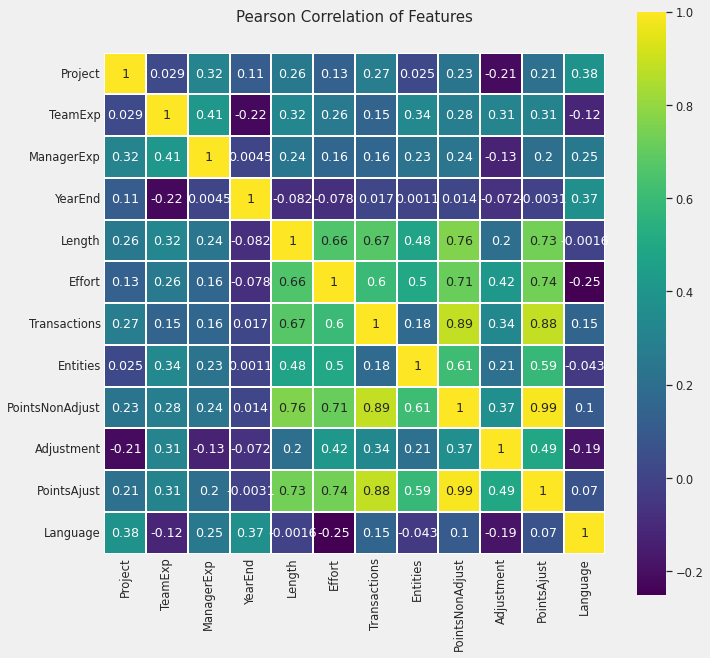

In [66]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)
sns.heatmap(data_frame.drop(['id'], axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)

# Visualize selected features vs. Effort

Text(0, 0.5, 'Effort')

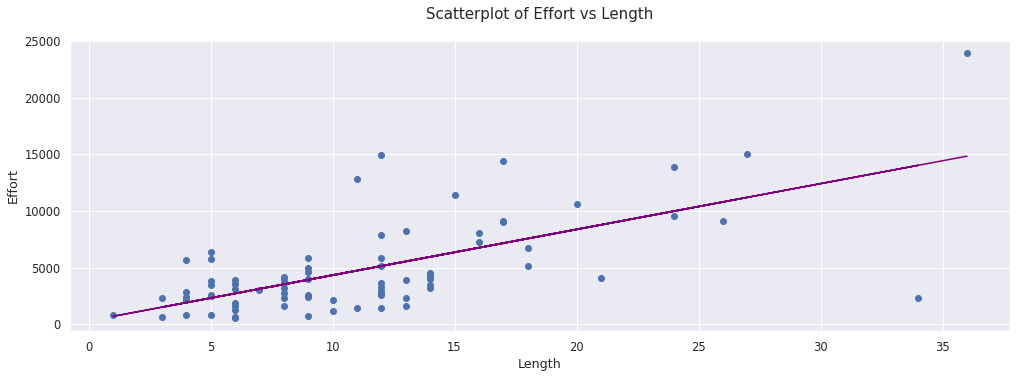

In [36]:
plt.title('Scatterplot of Effort vs Length', y=1.05, size=15)

sns.set(font_scale=1.05)
plt.scatter(data_frame['Length'], data_frame['Effort'], marker='o');

#find line of best fit
a, b = np.polyfit(data_frame['Length'], data_frame['Effort'], 1)

#add line of best fit to plot
plt.plot(data_frame['Length'], a*data_frame['Length']+b, color='purple')    

# Add x and y-axis labels
plt.xlabel('Length')
plt.ylabel('Effort')

Text(0, 0.5, 'Effort')

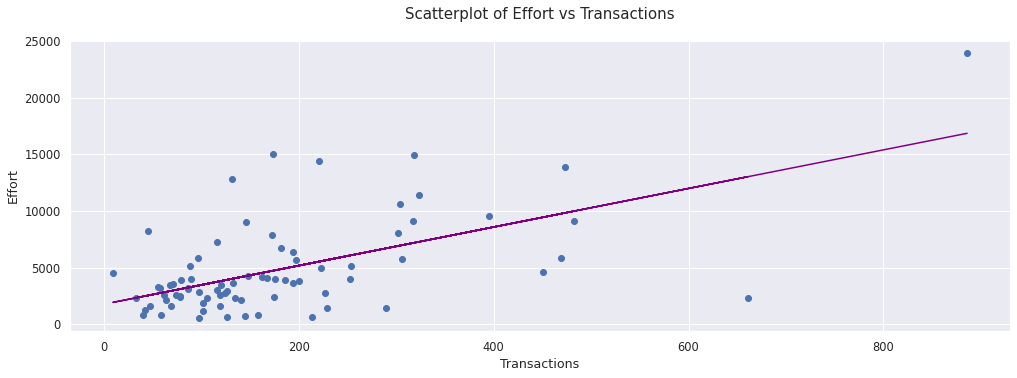

In [37]:
plt.title('Scatterplot of Effort vs Transactions', y=1.05, size=15)

sns.set(font_scale=1.05)
plt.scatter(data_frame['Transactions'], data_frame['Effort'], marker='o');

#find line of best fit
a, b = np.polyfit(data_frame['Transactions'], data_frame['Effort'], 1)

#add line of best fit to plot
plt.plot(data_frame['Transactions'], a*data_frame['Transactions']+b, color='purple')    

# Add x and y-axis labels
plt.xlabel('Transactions')
plt.ylabel('Effort')

Text(0, 0.5, 'Effort')

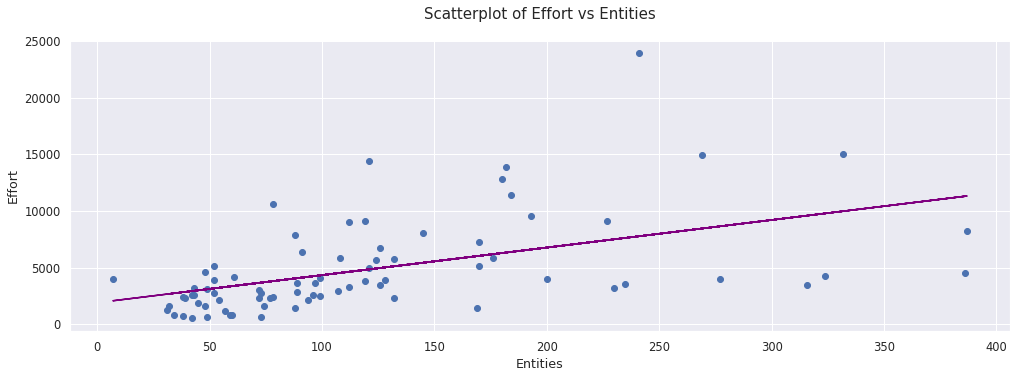

In [38]:
plt.title('Scatterplot of Effort vs Entities', y=1.05, size=15)

sns.set(font_scale=1.05)
plt.scatter(data_frame['Entities'], data_frame['Effort'], marker='o');

#find line of best fit
a, b = np.polyfit(data_frame['Entities'], data_frame['Effort'], 1)

#add line of best fit to plot
plt.plot(data_frame['Entities'], a*data_frame['Entities']+b, color='purple')    

# Add x and y-axis labels
plt.xlabel('Entities')
plt.ylabel('Effort')

Text(0, 0.5, 'Effort')

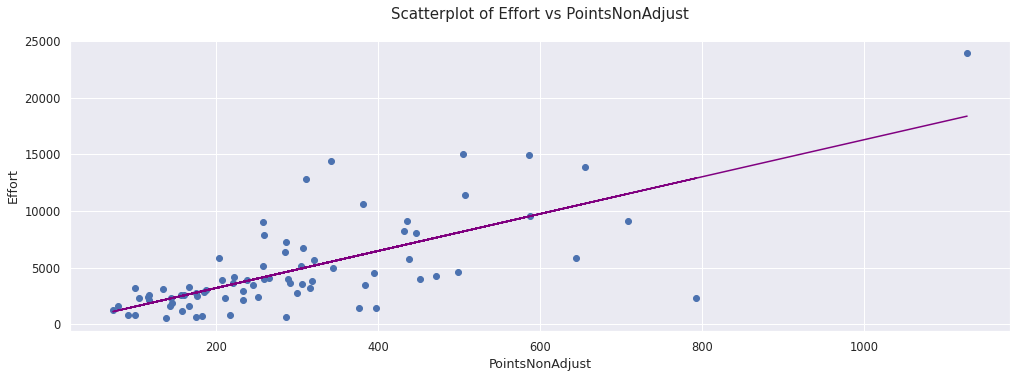

In [39]:
plt.title('Scatterplot of Effort vs PointsNonAdjust', y=1.05, size=15)

sns.set(font_scale=1.05)
plt.scatter(data_frame['PointsNonAdjust'], data_frame['Effort'], marker='o');

#find line of best fit
a, b = np.polyfit(data_frame['PointsNonAdjust'], data_frame['Effort'], 1)

#add line of best fit to plot
plt.plot(data_frame['PointsNonAdjust'], a*data_frame['PointsNonAdjust']+b, color='purple')    

# Add x and y-axis labels
plt.xlabel('PointsNonAdjust')
plt.ylabel('Effort')

Text(0, 0.5, 'Effort')

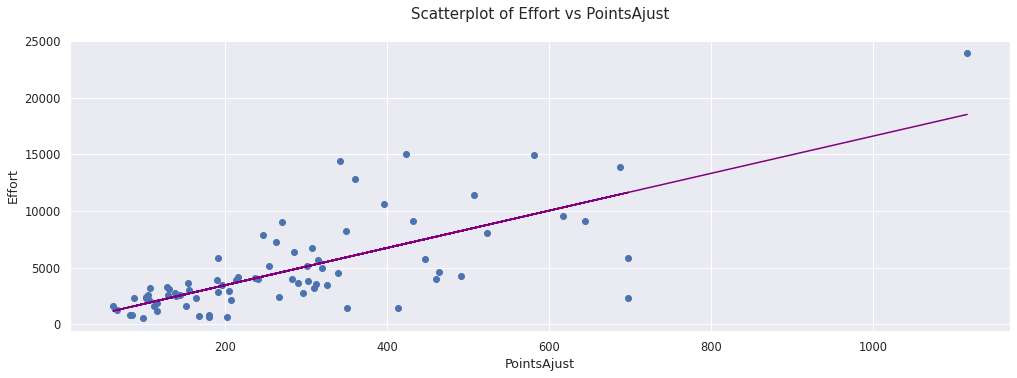

In [40]:
plt.title('Scatterplot of Effort vs PointsAjust', y=1.05, size=15)

sns.set(font_scale=1.05)
plt.scatter(data_frame['PointsAjust'], data_frame['Effort'], marker='o');

#find line of best fit
a, b = np.polyfit(data_frame['PointsAjust'], data_frame['Effort'], 1)

#add line of best fit to plot
plt.plot(data_frame['PointsAjust'], a*data_frame['PointsAjust']+b, color='purple')    

# Add x and y-axis labels
plt.xlabel('PointsAjust')
plt.ylabel('Effort')